2. Different forecasting techniques like simple exponential smoothing(SES) ,Simple moving average(SMA) , Hotwinters smoothing.Calculate the evaluation matric such as mean absolute error(MAE) , Mean squared error(MSE),root mean squared error(RMSE) for each forecasting technique. Identify the trnds and seasonal patterns for the above forecasting technique.

SMA - MAE: 34.34, MSE: 2321.78, RMSE: 48.18
SES - MAE: 27.50, MSE: 1453.43, RMSE: 38.12
HW - MAE: 13.79, MSE: 370.56, RMSE: 19.25


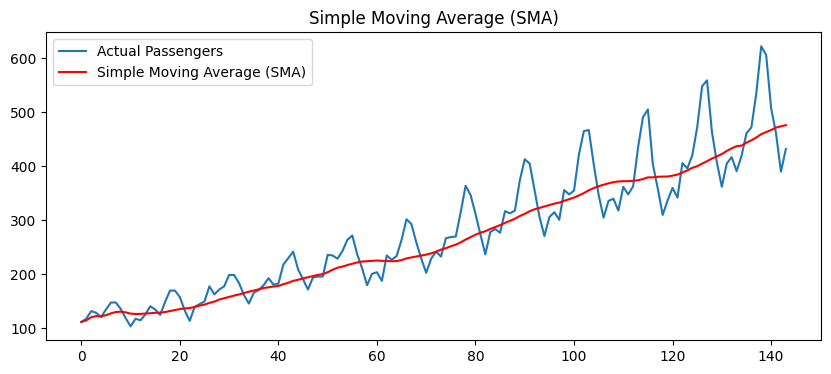

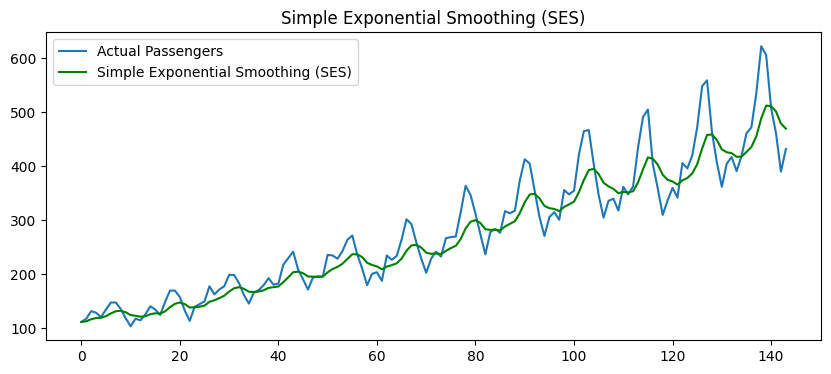

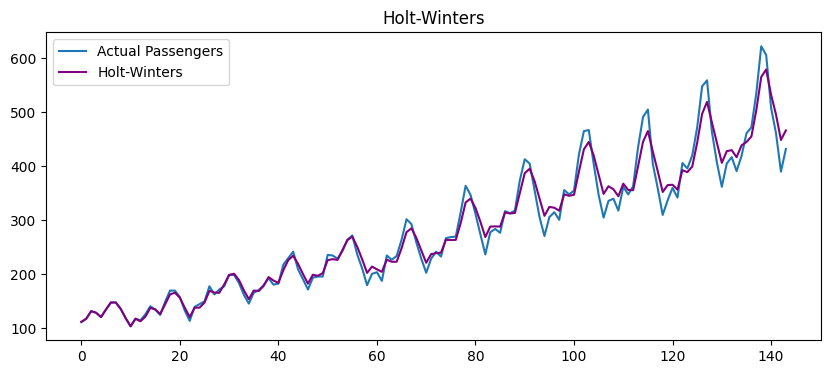

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

with open('airline-passengers.csv', 'r') as file:
    data = np.array([line.split(',') for line in file.read().splitlines()])
dates, passengers = data[:, 0], data[:, 1].astype(int)

def sma(data, window):
    return [np.mean(data[max(0, i-window+1):i+1]) for i in range(len(data))]

def ses(data, alpha):
    result = [data[0]]
    for i in range(1, len(data)):
        result.append(alpha * data[i] + (1 - alpha) * result[i-1])
    return result

def hw(data, alpha, beta, gamma, L):
    level, trend, seasonals = data[0], 0, [data[i] - data[0] for i in range(L)]
    result = [data[0]]
    for i in range(1, len(data)):
        prev_level = level
        level = alpha * (data[i] - seasonals[i % L]) + (1 - alpha) * (level + trend)
        trend = beta * (level - prev_level) + (1 - beta) * trend
        seasonals[i % L] = gamma * (data[i] - level) + (1 - gamma) * seasonals[i % L]
        result.append(level + trend + seasonals[i % L])
    return result

def mean_absolute_error(actual, forecast):
    return np.mean(np.abs(np.array(actual) - np.array(forecast)))

def mean_squared_error(actual, forecast):
    return np.mean((np.array(actual) - np.array(forecast)) ** 2)

def root_mean_squared_error(mse):
    return np.sqrt(mse)

sma_vals = sma(passengers, 12)
ses_vals = ses(passengers, 0.2)
hw_vals = hw(passengers, 0.3, 0.1, 0.1, 12)

sma_mae = mean_absolute_error(passengers[12:], sma_vals[12:])
sma_mse = mean_squared_error(passengers[12:], sma_vals[12:])
sma_rmse = root_mean_squared_error(sma_mse)

ses_mae = mean_absolute_error(passengers, ses_vals)
ses_mse = mean_squared_error(passengers, ses_vals)
ses_rmse = root_mean_squared_error(ses_mse)

hw_mae = mean_absolute_error(passengers, hw_vals)
hw_mse = mean_squared_error(passengers, hw_vals)
hw_rmse = root_mean_squared_error(hw_mse)

print(f"SMA - MAE: {sma_mae:.2f}, MSE: {sma_mse:.2f}, RMSE: {sma_rmse:.2f}")
print(f"SES - MAE: {ses_mae:.2f}, MSE: {ses_mse:.2f}, RMSE: {ses_rmse:.2f}")
print(f"HW - MAE: {hw_mae:.2f}, MSE: {hw_mse:.2f}, RMSE: {hw_rmse:.2f}")

def plot_results(data, forecast, title, color):
    plt.figure(figsize=(10, 4))
    plt.plot(data, label='Actual Passengers')
    plt.plot(forecast, label=title, color=color)
    plt.title(title)
    plt.legend()
    plt.show()

plot_results(passengers, sma_vals, 'Simple Moving Average (SMA)', 'red')
plot_results(passengers, ses_vals, 'Simple Exponential Smoothing (SES)', 'green')
plot_results(passengers, hw_vals, 'Holt-Winters', 'purple')